In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split

In [4]:
ct = make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]),
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])   
)

In [5]:
X = df.drop("charges",axis=1)
y = df["charges"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.2, random_state=42)

In [7]:
# fit the column transform inti training data
ct.fit(X_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['sex', 'smoker', 'region'])])

In [8]:
# Transform training and test data with normalization (MinMaxScaler) and OnehotEncoder 
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [9]:
tf.random.set_seed(42)

model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["mae"])

history=model_1.fit(X_train_normal,y_train,epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13342.9277 - mae: 13342.9277
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13332.6748 - mae: 13332.6748
Epoch 3/200
34/34 [==============================] - 0s 1ms/step - loss: 13307.8242 - mae: 13307.8242
Epoch 4/200
34/34 [==============================] - 0s 1ms/step - loss: 13257.8867 - mae: 13257.8867
Epoch 5/200
34/34 [==============================] - 0s 1ms/step - loss: 13172.2197 - mae: 13172.2197
Epoch 6/200
34/34 [==============================] - 0s 1ms/step - loss: 13040.1807 - mae: 13040.1807
Epoch 7/200
34/34 [==============================] - 0s 1ms/step - loss: 12851.8193 - mae: 12851.8193
Epoch 8/200
34/34 [==============================] - 0s 1ms/step - loss: 12597.1260 - mae: 12597.1260
Epoch 9/200
34/34 [==============================] - 0s 1ms/step - loss: 12265.9922 - mae: 12265.9922
Epoch 10/200
34/34 [==============================] - 0s 1ms/step - loss: 11856.32

34/34 [==============================] - 0s 2ms/step - loss: 3527.7803 - mae: 3527.7803
Epoch 162/200
34/34 [==============================] - 0s 2ms/step - loss: 3527.1785 - mae: 3527.1785
Epoch 163/200
34/34 [==============================] - 0s 2ms/step - loss: 3525.3103 - mae: 3525.3103
Epoch 164/200
34/34 [==============================] - 0s 1ms/step - loss: 3524.9592 - mae: 3524.9592
Epoch 165/200
34/34 [==============================] - 0s 1ms/step - loss: 3522.9951 - mae: 3522.9951
Epoch 166/200
34/34 [==============================] - 0s 1ms/step - loss: 3521.2659 - mae: 3521.2659
Epoch 167/200
34/34 [==============================] - 0s 972us/step - loss: 3520.3188 - mae: 3520.3188
Epoch 168/200
34/34 [==============================] - 0s 1ms/step - loss: 3518.8123 - mae: 3518.8123
Epoch 169/200
34/34 [==============================] - 0s 1ms/step - loss: 3517.6880 - mae: 3517.6880
Epoch 170/200
34/34 [==============================] - 0s 1ms/step - loss: 3516.5256 - mae: 35

In [10]:
model_1.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3169.1921 - mae: 3169.1921


[3169.192138671875, 3169.192138671875]

Text(0.5, 0, 'epochs')

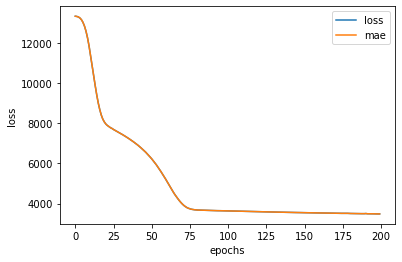

In [11]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [12]:
model_1.summary()  

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1200      
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________


In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
ct = make_column_transformer(
    (StandardScaler(),["age","bmi","children"]),
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])   
)

In [15]:
ct.fit(X_train)

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['sex', 'smoker', 'region'])])

In [16]:
X_train_normal_1 = ct.transform(X_train)
X_test_normal_1 = ct.transform(X_test)

In [25]:
tf.random.set_seed(42)

model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["mae"])

history=model_2.fit(X_train_normal,y_train,epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13343.7197 - mae: 13343.7197
Epoch 2/200
34/34 [==============================] - 0s 1ms/step - loss: 13335.0039 - mae: 13335.0039
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 13313.2119 - mae: 13313.2119
Epoch 4/200
34/34 [==============================] - 0s 1ms/step - loss: 13267.4922 - mae: 13267.4922
Epoch 5/200
34/34 [==============================] - 0s 1ms/step - loss: 13186.8408 - mae: 13186.8408
Epoch 6/200
34/34 [==============================] - 0s 1ms/step - loss: 13060.4717 - mae: 13060.4717
Epoch 7/200
34/34 [==============================] - 0s 1ms/step - loss: 12878.2734 - mae: 12878.2734
Epoch 8/200
34/34 [==============================] - 0s 1ms/step - loss: 12630.1973 - mae: 12630.1973
Epoch 9/200
34/34 [==============================] - 0s 1ms/step - loss: 12306.0322 - mae: 12306.0322
Epoch 10/200
34/34 [==============================] - 0s 1ms/step - loss: 11902.09

34/34 [==============================] - 0s 1ms/step - loss: 3677.0403 - mae: 3677.0403
Epoch 82/200
34/34 [==============================] - 0s 1ms/step - loss: 3673.9690 - mae: 3673.9690
Epoch 83/200
34/34 [==============================] - 0s 1ms/step - loss: 3668.0054 - mae: 3668.0054
Epoch 84/200
34/34 [==============================] - 0s 1ms/step - loss: 3664.7856 - mae: 3664.7856
Epoch 85/200
34/34 [==============================] - 0s 2ms/step - loss: 3661.7073 - mae: 3661.7073
Epoch 86/200
34/34 [==============================] - 0s 2ms/step - loss: 3660.4368 - mae: 3660.4368
Epoch 87/200
34/34 [==============================] - 0s 1ms/step - loss: 3657.4119 - mae: 3657.4119
Epoch 88/200
34/34 [==============================] - 0s 1ms/step - loss: 3655.1858 - mae: 3655.1858
Epoch 89/200
34/34 [==============================] - 0s 1ms/step - loss: 3653.7092 - mae: 3653.7092
Epoch 90/200
34/34 [==============================] - 0s 1ms/step - loss: 3651.9995 - mae: 3651.9995
Epo

34/34 [==============================] - 0s 1ms/step - loss: 3528.9612 - mae: 3528.9612
Epoch 162/200
34/34 [==============================] - 0s 1ms/step - loss: 3528.3777 - mae: 3528.3777
Epoch 163/200
34/34 [==============================] - 0s 1ms/step - loss: 3526.4302 - mae: 3526.4302
Epoch 164/200
34/34 [==============================] - 0s 1ms/step - loss: 3525.8989 - mae: 3525.8989
Epoch 165/200
34/34 [==============================] - 0s 1ms/step - loss: 3523.8337 - mae: 3523.8337
Epoch 166/200
34/34 [==============================] - 0s 1ms/step - loss: 3522.1316 - mae: 3522.1316
Epoch 167/200
34/34 [==============================] - 0s 1ms/step - loss: 3521.1548 - mae: 3521.1548
Epoch 168/200
34/34 [==============================] - 0s 1ms/step - loss: 3519.8628 - mae: 3519.8628
Epoch 169/200
34/34 [==============================] - 0s 1ms/step - loss: 3518.7749 - mae: 3518.7749
Epoch 170/200
34/34 [==============================] - 0s 1ms/step - loss: 3517.4216 - mae: 3517

In [27]:
model_2.evaluate(X_test_normal_1,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 10371.2412 - mae: 10371.2412


[10371.2412109375, 10371.2412109375]

Text(0.5, 0, 'epochs')

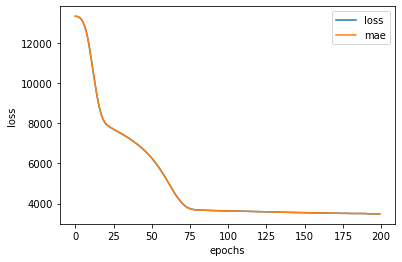

In [28]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [29]:
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 100)               1200      
                                                                 
 dense_10 (Dense)            (None, 10)                1010      
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________
